#### Spearman's Rank Correlation
Is a non-parametric measure of the strength and direction of the monotonic relationshp between two ranked variables


This means that it detects whether one variable consistently increases (or decreases) as the other increases, even if the relationship is not linear. Spearman works with ranks instead of raw data.

Can be used with ordinal data (where the variables are ranked)

The correlation coefficient (Spearman's rho, p) ranges between -1 and +1.

1: Perfect positive correlation (both variables increase together)

0: No correlation (no predictable relationship between variables)

-1: Perfect negative correlation (one variable increases while the other decreases)

Monotonic - (of a function or quantity) varying in such a way that it either never decreases or never increases.

non-parametric: Does not assume that the data is normally distributed

Rank-Based: It works on the ranks of the data rather than their raw values, making it robust against outliers.

##### Spearman Vs. Pearson

Use Pearson correlation when the relationship is linear and both variables are continous and normally distributed

Use Spearman correlation when the relationship is monotonic (but not necessarily linear), when working with ordinal data, or when there are outliers that might distort the results of Pearson correlation.

##### Spearman's Steps
1. rank the data (both variables)
2. Calculate the differences between the ranks 
3. Square the differences and sum
4. Plug numbers into formula
 
​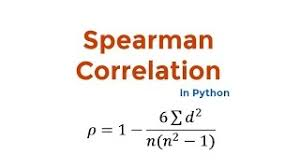


d is the difference between the ranks of each observation

n is the number of observations

spearmanr(a, b=None, axis=0, nan_policy='propagate', alternative='two-sided')


The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. Although calculation of the p-value does not make strong assumptions about the distributions underlying the samples, it is only accurate for very large samples (>500 observations). For smaller sample sizes, consider a permutation test (see Examples section below).

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
#Example 1 Manual Calculation using basic baseball statistics

hits = np.array([140, 180, 120, 210, 160])

#RBI (Runs Batted In) in baseball is a statistic that represents the total number of runs a player contributes by making plays at bat.
rbis = np.array([75, 90, 50, 100, 94])

In [4]:
#The first step would be to rank our hits and rbis
hits_rank = stats.rankdata(hits)
rbis_rank = stats.rankdata(rbis)

In [5]:
print(hits_rank)

[2. 4. 1. 5. 3.]


In [6]:
print(rbis_rank)

[2. 3. 1. 5. 4.]


In [7]:
#Find the difference (d)
d = hits_rank - rbis_rank

In [8]:
#Find the n value (length)
n = len(hits)

In [9]:
#Square our difference(s)
d_squared = d ** 2

In [10]:
#Now calculate everything with our formula
spearman_rank_manual = 1 - (6 *np.sum(d_squared)) / (n * (n**2-1))

In [11]:
print(spearman_rank_manual)

0.9


#Example 2, Scipy Example

In [12]:
spearman_rank_scipy, p_value = stats.spearmanr(hits, rbis)

In [13]:
print(spearman_rank_scipy)

0.8999999999999998


#Example 3: Ordinal Data

In [15]:
hours_grades = {
    'Hours_studied': [10, 15, 5, 18],
    'Grades': ['C', 'A', 'D', 'B']
}
df = pd.DataFrame(hours_grades)

#Pass in the grade_mapping (making it ordinal)
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1}

df['Grades_Ordinal'] = df['Grades'].map(grade_mapping)

In [16]:
df.head()

,Hours_studied,Grades,Grades_Ordinal
0,10,C,2
1,15,A,4
2,5,D,1
3,18,B,3


In [19]:
#now we need to rank this
df['Hours_Rank'] = df['Hours_studied'].rank()

df['Grades_Rank'] = df['Grades_Ordinal'].rank()

In [20]:
df.head()

,Hours_studied,Grades,Grades_Ordinal,Hours_Rank,Grades_Rank
0,10,C,2,2.0,2.0
1,15,A,4,3.0,4.0
2,5,D,1,1.0,1.0
3,18,B,3,4.0,3.0


In [22]:
#calculate the spearman rank
spearman_rank_pands = df[['Hours_Rank', 'Grades_Rank']].corr(method='spearman').iloc[0,1]
print(spearman_rank_pands)

0.8


In [18]:
import pandas as pd
from scipy.stats import spearmanr, pearsonr

# Expanded dataset
hours_grades2 = {
    'Hours_studied': [10, 15, 5, 18, 8, 12, 20, 9, 25, 30, 7, 14, 22, 6, 17, 13, 21, 4, 19, 16, 11, 3, 23, 2, 26, 28, 24, 1, 27, 29],
    'Grades': ['C', 'A', 'D', 'B', 'C', 'B', 'A', 'C', 'A', 'A', 'C', 'B', 'A', 'D', 'B', 'B', 'A', 'D', 'B', 'B', 'C', 'D', 'A', 'F', 'A', 'A', 'A', 'F', 'A', 'A']
}

# Map grades to numeric values for correlation analysis
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
hours_grades2['Grades_numeric'] = [grade_mapping[grade] for grade in hours_grades2['Grades']]

# Create a DataFrame
df2 = pd.DataFrame(hours_grades2)

# Calculate Spearman's Rank Correlation
spearman_corr, spearman_p_value = spearmanr(df2['Hours_studied'], df2['Grades_numeric'])

# Calculate Pearson's Correlation
pearson_corr, pearson_p_value = pearsonr(df2['Hours_studied'], df2['Grades_numeric'])

spearman_corr, spearman_p_value, pearson_corr, pearson_p_value


(0.9399549443114825,
 1.3404547757422648e-14,
 0.9261651095965792,
 2.2222743621300866e-13)